In [101]:
import pandas as pd
df=pd.read_csv("../data/databases/JBEI-ICE/all_features.csv")
df=df.dropna(subset=['sequence','name'])
df['seq_len']=df['sequence'].astype(str).apply(len)
df=df.drop_duplicates(["name","sequence"])
df=df[df['seq_len']>9]
#CDS cleanup
#>900 bp, divisable by 3, starts with ATG or GTG
df=df[(df['type']=="CDS")&(df["seq_len"]>900)&(df["seq_len"]%3==0)&((df['sequence'].str[:3]=='atg') | (df['sequence'].str[:3]=='gtg'))|(df['type']!="CDS")]

In [91]:
df

,end,id,multiple_locations,name,part_id,sequence,start,strand,type,seq_len
1,741,1023,False,RBS,93,tttaagaaggagatatacat,722,1,RBS,20
2,1572,1024,False,dbl term,93,ccaggcatcaaataaaacgaaaggctcagtcgaaagactgggcctt...,1444,1,misc_feature,129
4,706,1026,False,tet promoter region,93,taattcctaatttttgttgacactctatcgttgatagagttatttt...,634,1,promoter,73
5,673,1027,False,Q1,93,actctatcgttgatagagt,655,1,protein_bind,19
6,701,1028,False,Q2,93,tccctatcagtgataga,685,1,protein_bind,17
...,...,...,...,...,...,...,...,...,...,...
60596,422,228650,False,pTet,17497,tccctatcagtgatagagattgacatccctatcagtgatagagata...,369,1,promoter,54
60603,442,228604,False,gRNA_glnA6,17492,caaaggtcattgcaccaaca,423,1,misc_feature,20
60607,575,228608,False,Primer 1,17492,gctagttattgctcagcgg,557,-1,primer_bind,19
60614,2779,228615,False,synthetic DNA construct,17492,atataccatggccacaattcagcaaattgtgaacatcatcacgttc...,1,1,source,2779


In [97]:
df[df.duplicated("sequence",keep=False)].sort_values(by="sequence")

,end,id,multiple_locations,name,part_id,sequence,start,strand,type,seq_len
53081,72,131248,False,nLUC,11080,aaaaaaaaaaaaaaaaaaaaaaaaaaa,46,1,tag,27
53076,279,131243,False,cLUC,11080,aaaaaaaaaaaaaaaaaaaaaaaaaaa,253,1,tag,27
53077,162,131244,False,Terminator,11080,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,118,1,terminator,45
53080,207,131247,False,Promoter,11080,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,163,1,promoter,45
60580,334,228634,False,BBa_b1006,17497,aaaaaaaaaccccgcccctgacagggcggggtttttttt,296,1,terminator,39
...,...,...,...,...,...,...,...,...,...,...
30860,4695,106357,False,S. cerevisiae ADH1,7467,ttttagagctagaaatagcaagttaaaataaggctagtccgttatc...,3991,1,promoter,705
9677,2157,110830,False,100Leu2,8116,ttttccaataggtggttagcaatcgtcttactttctaacttttctt...,2058,1,misc_feature,100
5619,2205,88753,False,Prom_leu2-100,4944,ttttccaataggtggttagcaatcgtcttactttctaacttttctt...,2106,1,misc_feature,100
19936,676,139001,False,SUP4_terminator,13432,tttttttgttttttatgtct,657,1,terminator,20


In [52]:
import plotly.express as px
px.histogram(df,"seq_len",log_y=True,nbins=2000)

In [64]:
!jellyfish

Too few arguments
Usage: jellyfish <cmd> [options] arg...
Where <cmd> is one of: count, bc, info, stats, histo, dump, merge, query, cite, mem, jf.
Options:
  --version        Display version
  --help           Display this message


# Raw data

In [136]:
parts=pd.read_csv("../data/databases/JBEI-ICE/all_parts.csv")
parts=parts[parts['type']=='PART'][[
       'hasOriginalSequence', 'hasSample', 'hasSequence', 'id',
       'linkedParts', 'name', 'owner',
       'parents', 'partId',
       'recordId', 'sequence', 'sequence_length', 'shortDescription', 'status',
       'type']]
parts=parts[~parts.sequence.isnull()]

In [102]:
parts.columns

Index(['accessPermissions', 'bioSafetyLevel', 'canEdit', 'creationTime',
       'creatorId', 'customFields', 'featureCount', 'hasAttachment',
       'hasOriginalSequence', 'hasSample', 'hasSequence', 'id', 'index',
       'linkedParts', 'modificationTime', 'name', 'owner', 'ownerId',
       'parents', 'partId', 'principalInvestigatorId', 'publicRead',
       'recordId', 'sequence', 'sequence_length', 'shortDescription', 'status',
       'type', 'viewCount'],
      dtype='object')

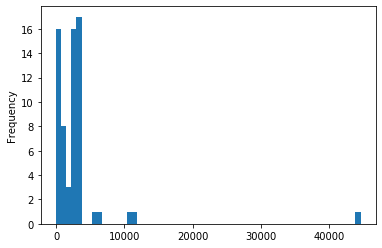

In [147]:
parts.sequence_length.plot.hist(bins=60)

In [151]:
parts[parts.sequence_length>5000]

,hasOriginalSequence,hasSample,hasSequence,id,linkedParts,name,owner,parents,partId,recordId,sequence,sequence_length,shortDescription,status,type
1961,False,False,True,10339,[],inducible HITES unit,Liang Xiao,[],JPUB_010339,c9dbdd4e-adfd-422f-adf4-a14649ce9517,tccggatatagttcctcctttcagcaaaaaacccctcaaggcccgt...,6154,The inducible HITES unit can be integrated int...,Complete,PART
1964,False,False,True,10341,[],constitutive HITES unit,Liang Xiao,[],JPUB_010341,a938b296-63f0-44d0-90ed-69a4f5b8a8f5,gtcagtgagcgaggaagcaccatgggcgcaacgcaattaatgtgag...,5489,The constitutive HITES unit can be integrated ...,Complete,PART
5189,False,False,True,816,[],sbol_cat,Michal Galdzicki,[],JPUB_000818,bdcd4e34-c529-4ae3-a8b3-7440d9014153,tccctatcagtgattccctatcagtgattccctatcagtgattccc...,44550,sbol_cat,Complete,PART
6388,True,False,True,8788,[],AnAF54,Yi-Lin Tsai,[],JPUB_008788,51ece484-6af4-45bd-bc7e-975fe8925459,cagtggagatatcacatcaatccacttgctttgaagacgtggttgg...,11236,Aspergillus nidulans GH54 α-arabinofuranosidas...,Complete,PART
6407,True,False,True,8790,[],PcGCE,Yi-Lin Tsai,[],JPUB_008790,0cafb2ab-2051-415b-a65e-3653e3f9461a,cagtggagatatcacatcaatccacttgctttgaagacgtggttgg...,10924,Phanerochaete carnosa CE13 glucuronoyl esteras...,Complete,PART


In [138]:
df[df['sequence']=='atggaagataaggtctacaagcgcccggtgagcatcctggtcgtcatctacgcgcaggacaccaagcgggtcctgatgctccagcgccgggatgacccggatttttggcaaagcgtcaccgggagcgtggaggaaggggagacggcgccgcaggccgcgatgcgggaggtgaaggaggaagtgaccatcgacgtggtggccgagcagctgaccctgattgactgccagcgcaccgtggagttcgagatcttttcgcacctgcgccatcgctatgccccgggcgtgacccgcaacaccgaaagctggttctgcctcgccctgccgcacgagcgccagatcgtcttcacggagcatctggcgtacaaatggctggacgccccggcggcggccgcgctgacgaagagctggtccaaccgccaggcgatcgagcagttcgtgattaacgccgcgtga']

,end,id,multiple_locations,name,part_id,sequence,start,strand,type,seq_len


,hasOriginalSequence,hasSample,hasSequence,id,linkedParts,name,owner,parents,partId,recordId,sequence,sequence_length,shortDescription,status,type
164,False,False,True,1412,[],nudB,Nathan Hillson,[],JPUB_001400,74bdaadd-1cb9-40c9-bd93-db6ef8d77b6b,atggaagataaggtctacaagcgcccggtgagcatcctggtcgtca...,453,Synthesized nudB gene,Complete,PART
167,False,False,True,1413,[],phaA,Nathan Hillson,[],JPUB_001401,be3988e8-4760-47dc-999b-4b7dd307c14a,atgaccgacgtggtcatcgtctcggccgcgcgcacggccgtgggca...,1179,Synthesized phaA gene,Complete,PART
172,False,False,True,1414,[],HMGS,Nathan Hillson,[],JPUB_001402,912f2db8-3dae-4047-8704-5baa3db5dd4f,atgaccatcggcatcgacaagatcaacttctacgtgccgaagtact...,1164,Synthesized HMGS,Complete,PART
176,False,False,True,1415,[],HMGR,Nathan Hillson,[],JPUB_001403,c15b8f1f-c7ea-44ea-ac73-c571eb71b9e9,atgcagtcgctggacaagaacttccgccacctgagccgcaaggaga...,1275,Synthesized HMGR,Complete,PART
180,False,False,True,1416,[],PMKj5,Nathan Hillson,[],JPUB_001404,3be4c434-a693-4c34-9f34-b7a91ae5b44e,atgtcggagctgcgcgccttcagcgcaccgggcaaggccctgctgg...,1362,Synthesized PMK,Complete,PART
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6091,True,False,True,6575,[],HUMINS02,Richard Moir,[],JPUB_006575,612fcf5c-8109-4229-a5a7-d0f68388ba20,atggccctgtggatgcgcctcctgcccctgctggcgctgctggccc...,333,"Human insulin CDS, variant 2",Complete,PART
6388,True,False,True,8788,[],AnAF54,Yi-Lin Tsai,[],JPUB_008788,51ece484-6af4-45bd-bc7e-975fe8925459,cagtggagatatcacatcaatccacttgctttgaagacgtggttgg...,11236,Aspergillus nidulans GH54 α-arabinofuranosidas...,Complete,PART
6407,True,False,True,8790,[],PcGCE,Yi-Lin Tsai,[],JPUB_008790,0cafb2ab-2051-415b-a65e-3653e3f9461a,cagtggagatatcacatcaatccacttgctttgaagacgtggttgg...,10924,Phanerochaete carnosa CE13 glucuronoyl esteras...,Complete,PART
7183,False,False,True,11080,[],SplitLUC,Uriel Urquiza,[],JPUB_011080,09c45ade-e9da-4ea2-8d02-f3880d901c05,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,324,Abstract specification for the creation of com...,Planned,PART
